In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
oecd = pd.read_csv('oecd.csv')
oecd = oecd.melt(id_vars='country', var_name='date', value_name='value')
oecd.index = pd.to_datetime(oecd['date'])

In [141]:
country_means = oecd.groupby('country')['value'].mean()
top_countries = country_means.nlargest(10).index
filtered_oecd = oecd[oecd['country'].isin(top_countries)]

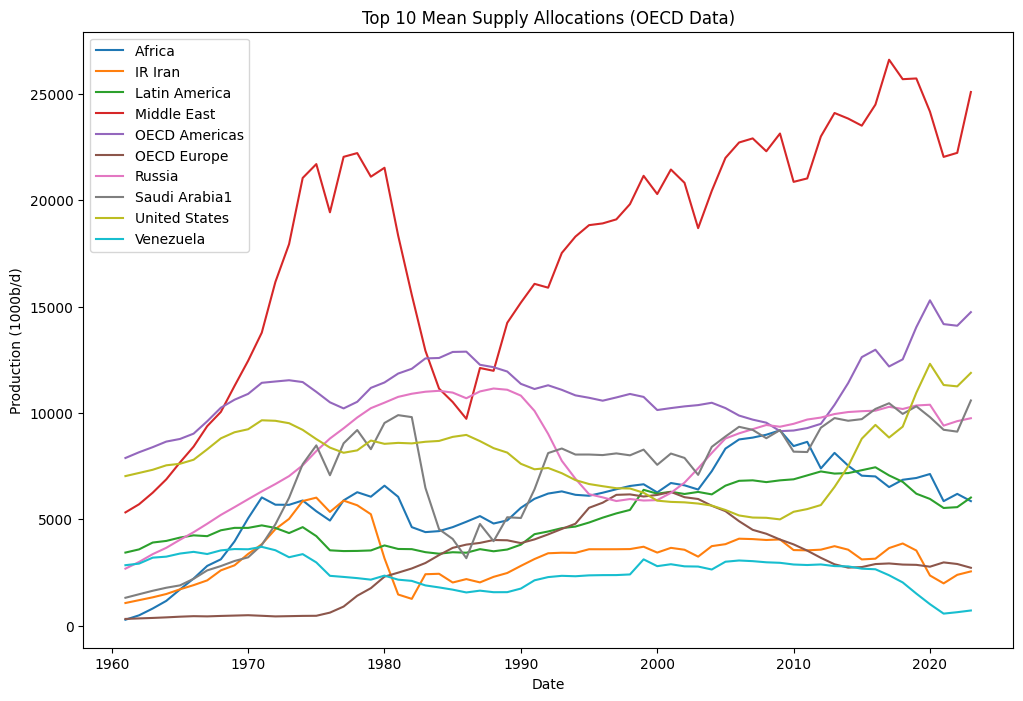

In [142]:
plt.figure(figsize=(12, 8))
for label, grp in filtered_oecd.groupby('country'):
    plt.plot(grp.index, grp['value'], label=label)

plt.title('Top 10 Mean Supply Allocations (OECD Data)')
plt.xlabel('Date')
plt.ylabel('Production (1000b/d)')
plt.legend()
plt.show()

([<matplotlib.axis.XTick at 0x1523cd49f40>,
 [Text(0.0, 0, '01/1/2010'),
  Text(156.0, 0, '12/28/2012'),
  Text(312.0, 0, '12/25/2015'),
  Text(468.0, 0, '12/21/2018'),
  Text(624.0, 0, '12/17/2021')])

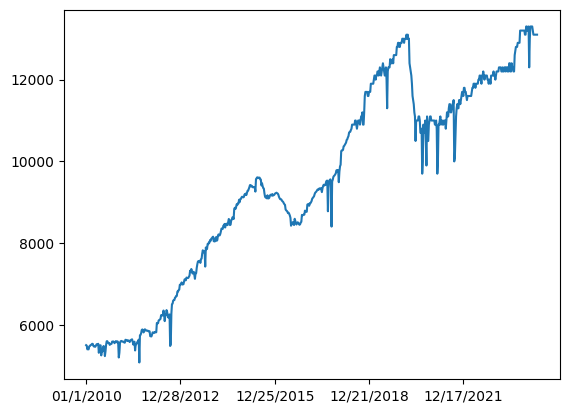

In [157]:
eia = pd.read_csv('eia.csv') 
plt.plot(eia['date'], eia['production'])
plt.xticks(eia['date'][::156])

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
oecd = pd.read_csv("oecd.csv")
oecd = oecd.transpose()
oecd.columns = oecd.iloc[0]
oecd = oecd.iloc[1:]
oecd = oecd.reset_index()

date = oecd["index"]
date = pd.to_datetime(date, format="%Y")
# print(date)

oecd = oecd.rename(columns={"index": "Year"})
lessen = [col for col in oecd.columns if "OECD" in col]
lessen.append("Year")
oecd = oecd[lessen]
del oecd["Year"]
# print(oecd)


eia = pd.read_csv('eia_year.csv')

eia[["Month", "date"]] = eia["Month"].str.split(" ", expand=True)
eia = (
    eia.groupby("date")["production"]
    .sum()
)
eia.index = pd.to_datetime(eia.index, format='%Y')
# print(eia)
print(date)
# plt.plot(eia['date'], eia['production'])

0    1961-01-01
1    1962-01-01
2    1963-01-01
3    1964-01-01
4    1965-01-01
        ...    
58   2019-01-01
59   2020-01-01
60   2021-01-01
61   2022-01-01
62   2023-01-01
Name: index, Length: 63, dtype: datetime64[ns]


In [161]:
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


eia_formatted = eia.to_numpy(dtype=int)
oecd_formatted = oecd.to_numpy(dtype=int)

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(oecd_formatted)

# Fit the model
model = OLS(eia_formatted, sm.add_constant(features_scaled))
results = model.fit()

# # Print summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     275.1
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.24e-34
Time:                        21:40:54   Log-Likelihood:                -849.45
No. Observations:                  63   AIC:                             1707.
Df Residuals:                      59   BIC:                             1715.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.899e+06   2.26e+04    128.297      0.0

63
63


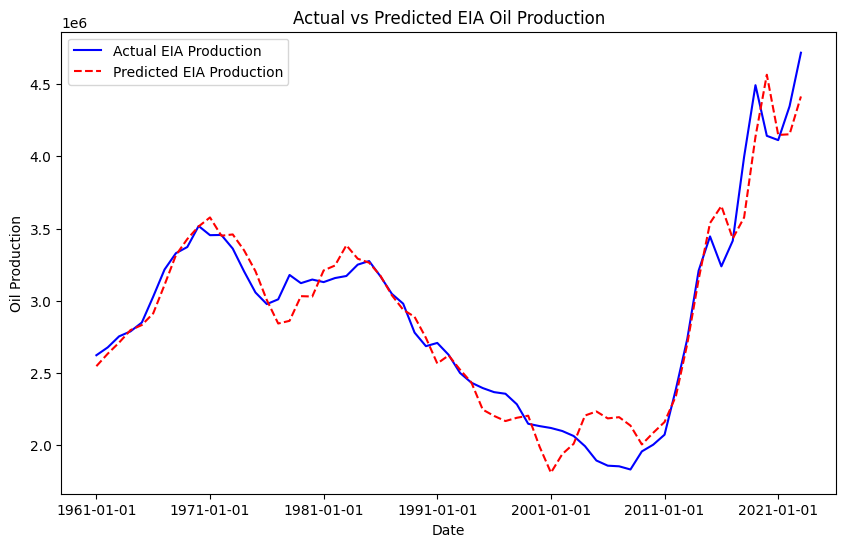

In [164]:
predictions = results.predict(sm.add_constant(features_scaled))
plt.figure(figsize=(10, 6))
print(len(date))
print(len(eia_formatted))
plt.plot(date, eia_formatted, label='Actual EIA Production', color='blue')
plt.plot(date, predictions, label='Predicted EIA Production', color='red', linestyle='--')
plt.xticks(date[::10])
plt.title('Actual vs Predicted EIA Oil Production')
plt.xlabel('Date')
plt.ylabel('Oil Production')
plt.legend()
plt.show()